<class 'numpy.ndarray'>
(450, 600, 3)
[[[221 131 131]
  [222 128 126]
  [223 129 127]
  ...
  [229 134 138]
  [226 136 138]
  [230 135 139]]

 [[223 129 129]
  [225 130 126]
  [228 132 133]
  ...
  [225 135 137]
  [226 136 136]
  [226 134 135]]

 [[222 128 126]
  [229 129 131]
  [231 130 134]
  ...
  [224 136 132]
  [227 136 133]
  [228 137 134]]

 ...

 [[209 118 125]
  [210 119 126]
  [212 121 126]
  ...
  [210 140 128]
  [209 141 130]
  [207 139 128]]

 [[205 116 118]
  [208 119 121]
  [209 120 124]
  ...
  [210 142 129]
  [212 144 131]
  [211 143 130]]

 [[207 116 115]
  [209 120 116]
  [208 120 118]
  ...
  [208 143 125]
  [211 146 126]
  [209 144 124]]]


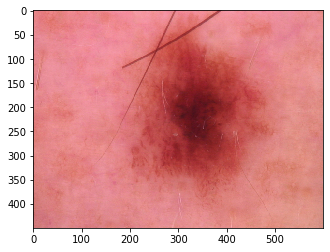

In [1]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import sklearn as sk
#from sklearn.datasets import load_sample_image

image = Image.open('/cxldata/skin_disease_1/HAM10000_images_draftv1/ISIC_0024306.jpg') 

data = np.asarray(image)
print(type(data))
print(data.shape)
print(data)
plt.imshow(data[:,:,:])


#load_img_rz = np.array(Image.open('C:\cloudxlab\skin_identification\dataverse_files\HAM10000_images_part_1\ISIC_0024306.jpg') .resize((254,254)))


array([[[187, 150, 192],
        [190, 154, 195],
        [192, 156, 198],
        ...,
        [195, 153, 167],
        [195, 156, 168],
        [195, 157, 170]],

       [[188, 151, 193],
        [191, 155, 196],
        [194, 156, 199],
        ...,
        [194, 154, 167],
        [195, 158, 169],
        [196, 156, 169]],

       [[189, 150, 192],
        [192, 152, 193],
        [193, 153, 194],
        ...,
        [194, 154, 166],
        [197, 157, 171],
        [196, 156, 167]],

       ...,

       [[159, 124, 157],
        [163, 127, 159],
        [165, 129, 158],
        ...,
        [185, 153, 176],
        [182, 150, 169],
        [179, 146, 160]],

       [[157, 124, 155],
        [159, 125, 155],
        [163, 125, 154],
        ...,
        [185, 155, 181],
        [181, 149, 168],
        [177, 145, 158]],

       [[155, 122, 152],
        [157, 120, 152],
        [160, 121, 150],
        ...,
        [184, 158, 185],
        [181, 150, 170],
        [175, 144, 160]]

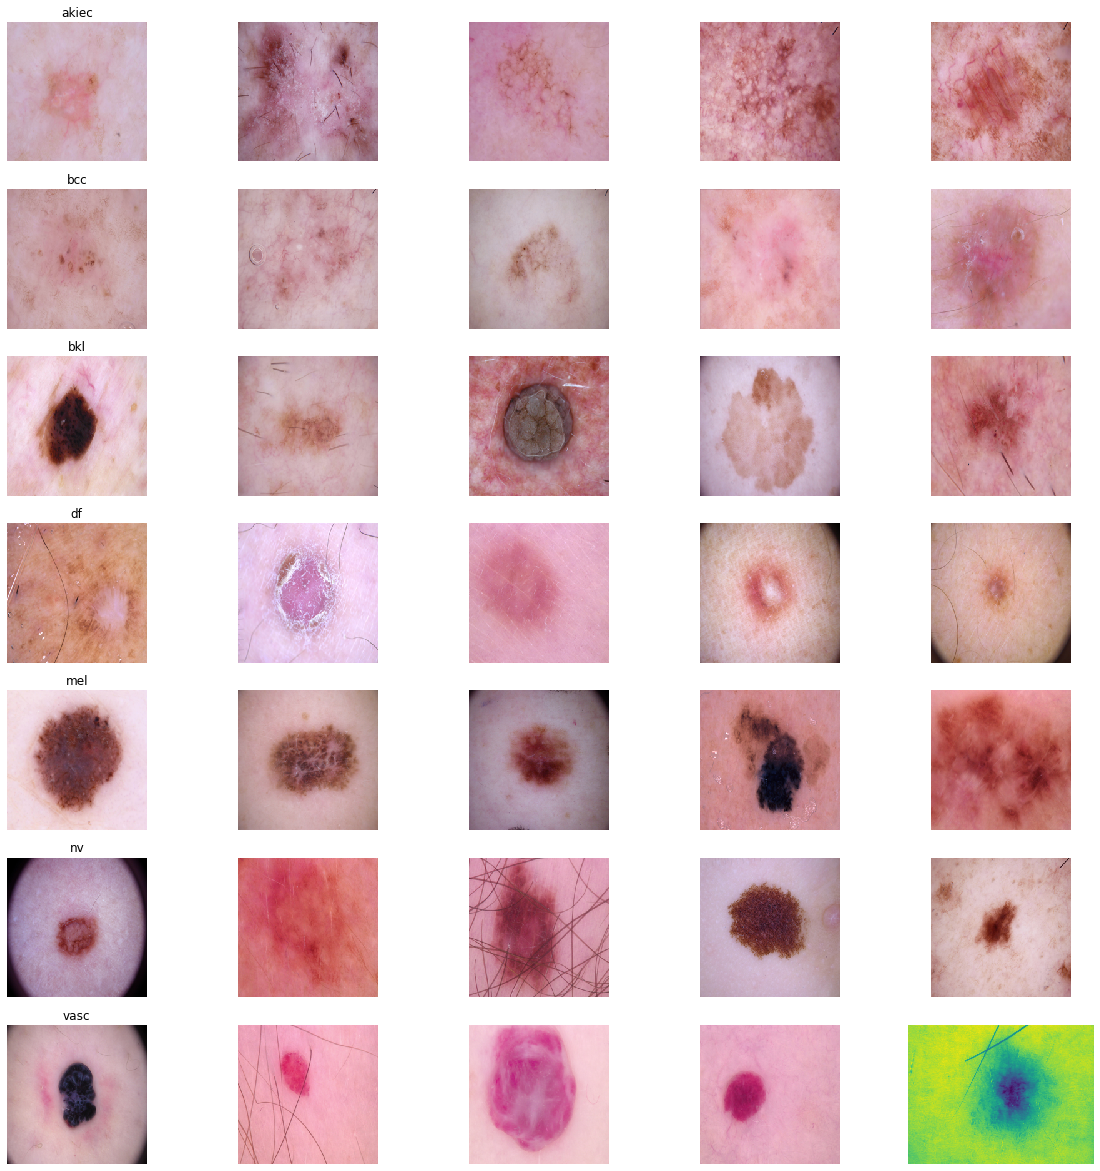

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
from PIL import Image
%matplotlib inline

base = '/cxldata/skin_disease_1/'

metadata = pd.read_csv(os.path.join(base,'HAM10000_metadata.csv'))

#metadata.info()
#if we combine data into one directory then no need to mention *
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join('/cxldata/skin_disease_1/HAM10000_images_draftv1/','*.jpg'))}


metadata['path'] = metadata['image_id'].map(image_path.get)

#upload data into dataset with resize 254,254
metadata['image'] = metadata['path'].map(lambda x: np.asarray(Image.open(x).resize((224,224))))


n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         metadata.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
        
        

plt.imshow(data[:,:,0])
metadata['image'][0]




In [3]:
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[187, 150, 192], [190, 154, 195], [192, 156,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[24, 13, 22], [25, 13, 23], [24, 14, 23], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[186, 127, 135], [188, 129, 137], [191, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[23, 11, 15], [24, 11, 18], [24, 10, 19], [2..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[125, 83, 105], [132, 89, 112], [138, 93, 11..."
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[115, 92, 101], [108, 92, 96], [108, 91, 98]..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[4, 6, 3], [5, 6, 3], [6, 6, 5], [7, 8, 4], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[105, 92, 96], [109, 102, 103], [118, 109, 1..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[156, 115, 138], [158, 117, 138], [160, 121,..."


In [7]:
metadata['image'][0].shape

(224, 224, 3)

In [8]:
metadata['image'][0]

array([[[187, 149, 191],
        [188, 152, 194],
        [191, 155, 198],
        ...,
        [195, 154, 168],
        [195, 155, 169],
        [196, 157, 169]],

       [[188, 151, 193],
        [191, 154, 196],
        [193, 156, 199],
        ...,
        [194, 156, 168],
        [195, 157, 168],
        [196, 156, 170]],

       [[188, 151, 192],
        [191, 153, 193],
        [194, 155, 196],
        ...,
        [194, 156, 169],
        [197, 157, 171],
        [196, 156, 167]],

       ...,

       [[159, 123, 156],
        [161, 126, 158],
        [165, 128, 158],
        ...,
        [184, 152, 175],
        [181, 149, 167],
        [178, 146, 158]],

       [[157, 123, 154],
        [158, 124, 155],
        [162, 125, 154],
        ...,
        [184, 154, 179],
        [180, 148, 166],
        [176, 143, 157]],

       [[154, 121, 151],
        [157, 120, 152],
        [158, 120, 150],
        ...,
        [182, 156, 181],
        [180, 149, 168],
        [174, 145, 160]]

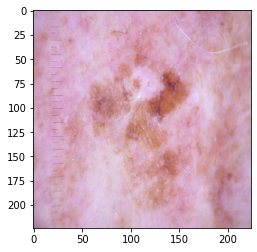

In [8]:
plt.imshow(metadata['image'][0])

In [9]:
metadata.to_csv('/cxldata/skin_disease_1/metadata.csv')

In [10]:
metadata['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [23]:
#bkl_sk = metadata[metadata['dx'] == 'bkl']

In [12]:
cat = ['bkl']


In [13]:
metadata.dx.isin(cat)

0         True
1         True
2         True
3         True
4         True
         ...  
10010    False
10011    False
10012    False
10013    False
10014    False
Name: dx, Length: 10015, dtype: bool

In [14]:
metadata[metadata.dx.isin(cat)]

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[187, 150, 192], [190, 154, 195], [192, 156,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[24, 13, 22], [25, 13, 23], [24, 14, 23], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[186, 127, 135], [188, 129, 137], [191, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[23, 11, 15], [24, 11, 18], [24, 10, 19], [2..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[125, 83, 105], [132, 89, 112], [138, 93, 11..."
...,...,...,...,...,...,...,...,...,...,...
3326,HAM_0002276,ISIC_0025366,bkl,consensus,50.0,female,trunk,vidir_molemax,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[235, 190, 197], [237, 190, 200], [238, 193,..."
7100,HAM_0006159,ISIC_0028977,bkl,consensus,50.0,female,upper extremity,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[128, 94, 89], [138, 100, 95], [147, 106, 92..."
9546,HAM_0003807,ISIC_0032655,bkl,consensus,40.0,male,unknown,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[174, 160, 188], [174, 160, 190], [174, 162,..."
9630,HAM_0003807,ISIC_0033620,bkl,consensus,40.0,male,unknown,vidir_modern,/cxldata/skin_disease_1/HAM10000_images_draftv...,"[[[148, 128, 153], [147, 132, 153], [150, 136,..."


In [30]:
##data augmentation#####

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('/cxldata/skin_disease_1/HAM10000_images_draftv1/ISIC_0027419.jpg', target_size= (224,224))


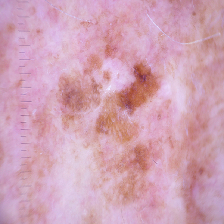

In [31]:
img

In [32]:
x = img_to_array(img)  # this is a Numpy array with shape (224, 224,3 )
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1,224, 224,3)

In [33]:
x.shape

(1, 224, 224, 3)

In [34]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [23]:
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/cxldata/skin_disease_1/aug', save_prefix='bkl', save_format='jpg'):
    i += 1
    if i > 100:
        break 

In [35]:
img_1 = load_img('/cxldata/skin_disease_1/HAM10000_images_draftv1/ISIC_0029417.jpg', target_size= (224,224))
x_1 = img_to_array(img_1)  # this is a Numpy array with shape (3, 224, 224)
x_1 = x_1.reshape((1,) + x_1.shape)
x_1.shape




(1, 224, 224, 3)

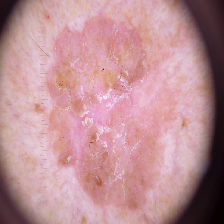

In [36]:
img_1

In [29]:
i = 0
for batch in datagen.flow(x_1, batch_size=1,
                          save_to_dir='/cxldata/skin_disease_1/aug/akiec', save_prefix='akiec', save_format='jpg'):
    i += 1
    if i > 100:
        break 